## Importing necessary libraries

In [46]:
# importing all necessary libraries
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from tqdm.notebook import tqdm as tqdm

import plotly.graph_objs as go #visualization library
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #autocorrelation test
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller #stationarity test
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from datetime import datetime, timedelta
import statsmodels.api as sm
import gc
from pylab import rcParams
import random
import os
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import gc
import lightgbm as lgb
import time
import numpy as np
import pandas as pd
import os
import time
import matplotlib.dates as mdates
import gc
import lightgbm as lgb
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
import multiprocessing as mp
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Exploratory Data Analysis

### Reading the data

In [2]:
df=pd.read_csv("one_bu_test_train_dataset.csv")
df.head()

,product_id,Business Unit,Business Group,Major Product Group,Product Group,lineage,monthly_date,month,avg_map_discount,discount_avg,price,days_discount,days_map_discount,sell_in_qty,requested_qty,discount_max,max_map_discount
0,534,2,9052,E43,3199,7131,4/1/2020,4,0.0,0.0,66.86793,0.0,0.0,417.000000,507.000000,0.0,0.0
1,534,2,9052,E43,3199,7131,12/1/2019,12,0.0,0.0,66.86793,0.0,0.0,87.000000,87.000000,0.0,0.0
2,534,2,9052,E43,3199,7131,2/1/2020,2,0.0,0.0,66.86793,0.0,0.0,12.428571,27.857143,0.0,0.0
3,534,2,9052,E43,3199,7131,3/1/2020,3,0.0,0.0,66.86793,0.0,0.0,78.000000,102.000000,0.0,0.0
4,534,2,9052,E43,3199,7131,11/1/2019,11,0.0,0.0,66.86793,0.0,0.0,19.714286,23.142857,0.0,0.0


In [3]:
df.describe()

,product_id,Business Unit,Business Group,Product Group,lineage,month,avg_map_discount,discount_avg,price,days_discount,days_map_discount,sell_in_qty,requested_qty,discount_max,max_map_discount
count,6671.000000,6671.0,6671.000000,6671.000000,6671.000000,6671.000000,6671.000000,6671.000000,6671.000000,6671.000000,6671.000000,6288.000000,6288.000000,6671.000000,6671.000000
mean,659.009144,2.0,9051.999101,3910.323040,7414.798681,6.063858,0.012053,0.006888,6.971916,0.022108,0.048569,1828.793142,2006.720965,0.006888,0.012053
std,100.710695,0.0,0.042406,1655.815943,246.263459,3.457187,0.046340,0.037073,11.344042,0.132349,0.199064,4115.636764,4512.946208,0.037073,0.046340
min,493.000000,2.0,9050.000000,3108.000000,6979.000000,1.000000,0.000000,0.000000,1.224720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,569.000000,2.0,9052.000000,3185.000000,7222.000000,3.000000,0.000000,0.000000,1.885633,0.000000,0.000000,128.061224,128.571429,0.000000,0.000000
50%,657.000000,2.0,9052.000000,3190.000000,7403.000000,6.000000,0.000000,0.000000,2.788491,0.000000,0.000000,579.285714,613.285714,0.000000,0.000000
75%,743.000000,2.0,9052.000000,3192.000000,7584.000000,9.000000,0.000000,0.000000,7.252670,0.000000,0.000000,1842.857143,1981.714286,0.000000,0.000000
max,839.000000,2.0,9052.000000,7757.000000,7939.000000,12.000000,0.224719,0.298433,72.614650,1.000000,1.000000,79274.571430,113074.285700,0.298433,0.224719


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6671 entries, 0 to 6670
Data columns (total 17 columns):
product_id             6671 non-null int64
Business Unit          6671 non-null int64
Business Group         6671 non-null int64
Major Product Group    6671 non-null object
Product Group          6671 non-null int64
lineage                6671 non-null int64
monthly_date           6671 non-null object
month                  6671 non-null int64
avg_map_discount       6671 non-null float64
discount_avg           6671 non-null float64
price                  6671 non-null float64
days_discount          6671 non-null float64
days_map_discount      6671 non-null float64
sell_in_qty            6288 non-null float64
requested_qty          6288 non-null float64
discount_max           6671 non-null float64
max_map_discount       6671 non-null float64
dtypes: float64(9), int64(6), object(2)
memory usage: 886.1+ KB


### Since there is only one business unit considered which is "2". The Business Unit column is dropped.

In [5]:
df["Business Unit"].unique()
del df["Business Unit"]

### There are two business groups 9052 and 9050. There are only 3 samples for 9050, there the data corresponding to 9050 is dropped.

In [6]:
print(df["Business Group"].unique())

[9052 9050]


In [7]:
print("Length of data for Business Group 9052 is ",len(df[df["Business Group"]==9052]))
print("Length of data for Business Group 9050 is ",len(df[df["Business Group"]==9050]))

Length of data for Business Group 9052 is  6668
Length of data for Business Group 9050 is  3


In [8]:
df[df["Business Group"]==9050]

,product_id,Business Group,Major Product Group,Product Group,lineage,monthly_date,month,avg_map_discount,discount_avg,price,days_discount,days_map_discount,sell_in_qty,requested_qty,discount_max,max_map_discount
454,528,9050,E43,3199,7095,4/1/2018,4,0.0,0.0,65.958827,0.0,0.0,9.000000,36.000000,0.0,0.0
4798,513,9050,O35,7746,7044,11/1/2019,11,0.0,0.0,11.009155,0.0,0.0,2.142857,19.428571,0.0,0.0
4799,513,9050,O35,7746,7044,10/1/2019,10,0.0,0.0,11.009155,0.0,0.0,2.857143,8.571429,0.0,0.0


### Dropping the  Business Group and the 3 samples corresponding to 9050

In [9]:
del df["Business Group"]
df=df.drop([454, 4798, 4799])

### Unique Values for Major Product Group

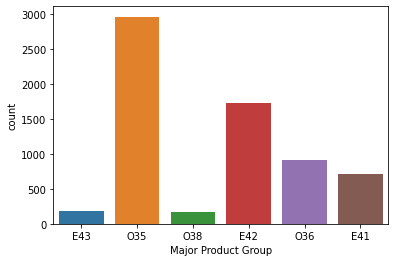

In [10]:
ax = sns.countplot(x="Major Product Group", data=df)

In [11]:
print(len(df["Major Product Group"].unique()))
df["Major Product Group"].unique()

6


array(['E43', 'O35', 'O38', 'E42', 'O36', 'E41'], dtype=object)

### Unique Values for Product Group

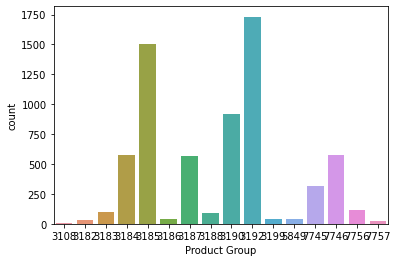

In [12]:
ax = sns.countplot(x="Product Group", data=df)

In [13]:
print(len(df["Product Group"].unique()))
df["Product Group"].unique()

16


array([3199, 3187, 7746, 5849, 3185, 3192, 7745, 3190, 3184, 3108, 3186,
       3183, 7756, 3188, 3182, 7757])

### Unique Values for lineage

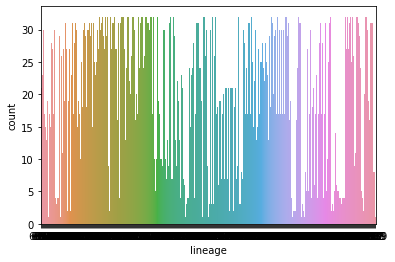

In [14]:
ax = sns.countplot(x="lineage", data=df)

In [15]:
print(len(df["lineage"].unique()))
df["lineage"].unique()

335


array([7131, 7701, 7043, 6987, 6980, 6983, 7428, 7734, 7476, 7739, 7148,
       7376, 7899, 7392, 7401, 7411, 7136, 7145, 7394, 7495, 7587, 7240,
       7494, 7531, 7812, 7352, 7164, 7374, 7253, 7204, 7560, 7578, 7275,
       7589, 7689, 7452, 7604, 7532, 7551, 7830, 7379, 7470, 7693, 7852,
       6997, 7069, 7304, 7093, 7279, 7297, 7160, 7565, 7261, 7832, 7101,
       7283, 7694, 7217, 7603, 7294, 7221, 7474, 7220, 7280, 7398, 7555,
       7245, 7483, 7776, 7274, 7801, 7086, 7799, 7529, 7685, 7580, 7241,
       7211, 7897, 7381, 7471, 7473, 7246, 7545, 7703, 7284, 7305, 7257,
       7546, 7601, 7172, 7850, 7234, 7867, 7606, 7618, 6998, 6995, 7265,
       7225, 7433, 7477, 7889, 6994, 7252, 7552, 7873, 7464, 7841, 7267,
       7526, 7461, 7171, 7232, 7070, 7458, 7239, 7441, 7263, 7285, 7481,
       7166, 7780, 7387, 7521, 7624, 7888, 7386, 7627, 7579, 7646, 7602,
       7199, 7385, 7798, 7519, 7702, 7840, 7484, 7800, 7216, 7223, 7523,
       7553, 7902, 7218, 7278, 7151, 7227, 7686, 78

### Unique Values for product_id

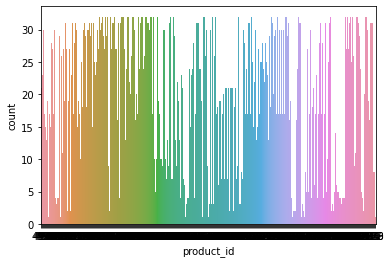

In [16]:
ax = sns.countplot(x="product_id", data=df)

In [17]:
print(len(df["product_id"].unique()))
df["product_id"].unique()

335


array([534, 786, 512, 497, 494, 495, 671, 791, 694, 793, 541, 643, 834,
       651, 656, 663, 536, 538, 652, 702, 745, 579, 701, 715, 809, 630,
       548, 641, 588, 557, 733, 738, 602, 746, 776, 679, 752, 716, 727,
       814, 646, 688, 779, 824, 503, 518, 617, 527, 604, 616, 544, 736,
       594, 815, 530, 607, 780, 565, 751, 613, 568, 692, 567, 605, 655,
       730, 582, 698, 797, 601, 805, 524, 803, 714, 773, 740, 580, 561,
       832, 647, 689, 691, 583, 723, 788, 608, 618, 591, 724, 749, 553,
       822, 576, 826, 754, 758, 504, 502, 598, 571, 672, 695, 831, 501,
       587, 728, 827, 685, 819, 600, 712, 682, 552, 575, 519, 681, 578,
       676, 596, 609, 696, 550, 798, 650, 709, 759, 830, 649, 760, 739,
       763, 750, 554, 648, 802, 707, 787, 818, 699, 804, 564, 570, 710,
       729, 835, 566, 603, 542, 572, 774, 820, 770, 560, 589, 551, 792,
       789, 761, 667, 498, 823, 713, 683, 540, 674, 510, 586, 821, 499,
       531, 659, 697, 514, 515, 611, 794, 795, 743, 711, 543, 83

### Below we can see each lineage is mapped to a unique product_id. We can either take product_id as a feature or the lineage as a feature. So lineage is dropped and product_id is considered as a feature.

In [18]:
pi=[]
for i in df["lineage"].unique():
    t_f=df[df["lineage"]==i]
    pi.append(t_f["product_id"].unique())
print(pi)

[array([534]), array([786]), array([512]), array([497]), array([494]), array([495]), array([671]), array([791]), array([694]), array([793]), array([541]), array([643]), array([834]), array([651]), array([656]), array([663]), array([536]), array([538]), array([652]), array([702]), array([745]), array([579]), array([701]), array([715]), array([809]), array([630]), array([548]), array([641]), array([588]), array([557]), array([733]), array([738]), array([602]), array([746]), array([776]), array([679]), array([752]), array([716]), array([727]), array([814]), array([646]), array([688]), array([779]), array([824]), array([503]), array([518]), array([617]), array([527]), array([604]), array([616]), array([544]), array([736]), array([594]), array([815]), array([530]), array([607]), array([780]), array([565]), array([751]), array([613]), array([568]), array([692]), array([567]), array([605]), array([655]), array([730]), array([582]), array([698]), array([797]), array([601]), array([805]), array

In [19]:
# lineage is dropped
del df["lineage"]

### We are left with the following features now. Also, the date is converted to the datetime format.

Now the hierarchy is reduced to:
Major Product Group---
                       |
                       |
                       Product Group---
                                       |
                                       |
                                       Product_id

In [20]:
df['monthly_date'] = pd.to_datetime(df['monthly_date'], format='%m/%d/%Y')
df.head()

,product_id,Major Product Group,Product Group,monthly_date,month,avg_map_discount,discount_avg,price,days_discount,days_map_discount,sell_in_qty,requested_qty,discount_max,max_map_discount
0,534,E43,3199,2020-04-01,4,0.0,0.0,66.86793,0.0,0.0,417.000000,507.000000,0.0,0.0
1,534,E43,3199,2019-12-01,12,0.0,0.0,66.86793,0.0,0.0,87.000000,87.000000,0.0,0.0
2,534,E43,3199,2020-02-01,2,0.0,0.0,66.86793,0.0,0.0,12.428571,27.857143,0.0,0.0
3,534,E43,3199,2020-03-01,3,0.0,0.0,66.86793,0.0,0.0,78.000000,102.000000,0.0,0.0
4,534,E43,3199,2019-11-01,11,0.0,0.0,66.86793,0.0,0.0,19.714286,23.142857,0.0,0.0


### Looking at the correlation of the matrix we can say that sell_in_qty and requested_qty have a good linear correlation.  Avg_map, days_map_discount, discount_max and map_discount are also correlated to each other.

In [21]:
df.corr()

,product_id,Product Group,month,avg_map_discount,discount_avg,price,days_discount,days_map_discount,sell_in_qty,requested_qty,discount_max,max_map_discount
product_id,1.000000,-0.468576,-0.013078,0.001189,-0.000412,-0.257610,-0.012168,0.015680,0.012434,0.017140,-0.000412,0.001189
Product Group,-0.468576,1.000000,0.003658,-0.113899,-0.079439,0.299590,-0.070006,-0.106844,-0.037731,-0.017432,-0.079439,-0.113899
month,-0.013078,0.003658,1.000000,-0.127286,-0.032349,0.005926,-0.063368,-0.068557,-0.030550,-0.042987,-0.032349,-0.127286
avg_map_discount,0.001189,-0.113899,-0.127286,1.000000,0.625395,0.068040,0.636226,0.854351,-0.035694,-0.022862,0.625395,1.000000
discount_avg,-0.000412,-0.079439,-0.032349,0.625395,1.000000,0.038676,0.878505,0.510448,-0.006553,0.001935,1.000000,0.625395
price,-0.257610,0.299590,0.005926,0.068040,0.038676,1.000000,0.040487,0.061868,-0.085173,-0.072694,0.038676,0.068040
days_discount,-0.012168,-0.070006,-0.063368,0.636226,0.878505,0.040487,1.000000,0.575462,-0.010354,-0.000832,0.878505,0.636226
days_map_discount,0.015680,-0.106844,-0.068557,0.854351,0.510448,0.061868,0.575462,1.000000,-0.037451,-0.027223,0.510448,0.854351
sell_in_qty,0.012434,-0.037731,-0.030550,-0.035694,-0.006553,-0.085173,-0.010354,-0.037451,1.000000,0.928953,-0.006553,-0.035694
requested_qty,0.017140,-0.017432,-0.042987,-0.022862,0.001935,-0.072694,-0.000832,-0.027223,0.928953,1.000000,0.001935,-0.022862


### The boxplot shows that for the sell_in_qty and requested_qty there are few outliers and they specifically are the products which have a higher demand.

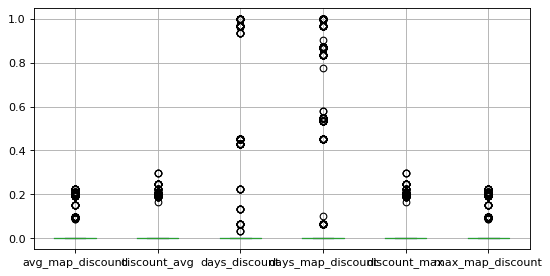

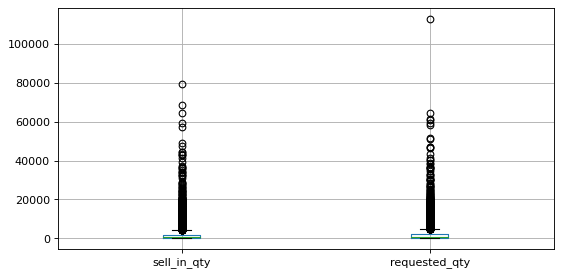

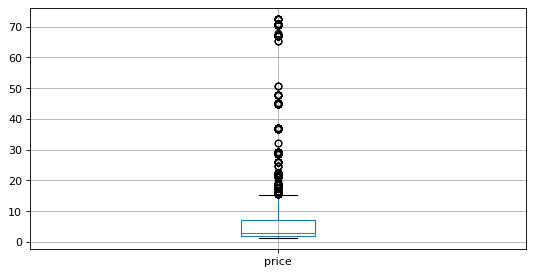

In [22]:
figure(figsize=(8, 4), dpi=80)
df.drop(["product_id","Product Group","month","requested_qty","sell_in_qty","price"],axis=1).boxplot()
figure(figsize=(8, 4), dpi=80)
df.drop(["product_id","Product Group","month",'discount_max','max_map_discount',
         'avg_map_discount', 'discount_avg', 'days_discount',
       'days_map_discount',"price"],axis=1).boxplot()
figure(figsize=(8, 4), dpi=80)
df.drop(["product_id","Product Group","month",'discount_max','max_map_discount',
         'avg_map_discount', 'discount_avg', 'days_discount',
       'days_map_discount','sell_in_qty', 'requested_qty'],axis=1).boxplot()

### The correlation further confirms our findings:
- Strong correlation between requested_qty and sell_in_qty.
- The distribution is right skewed for all features.
- It also shows some linear relation between discount features.

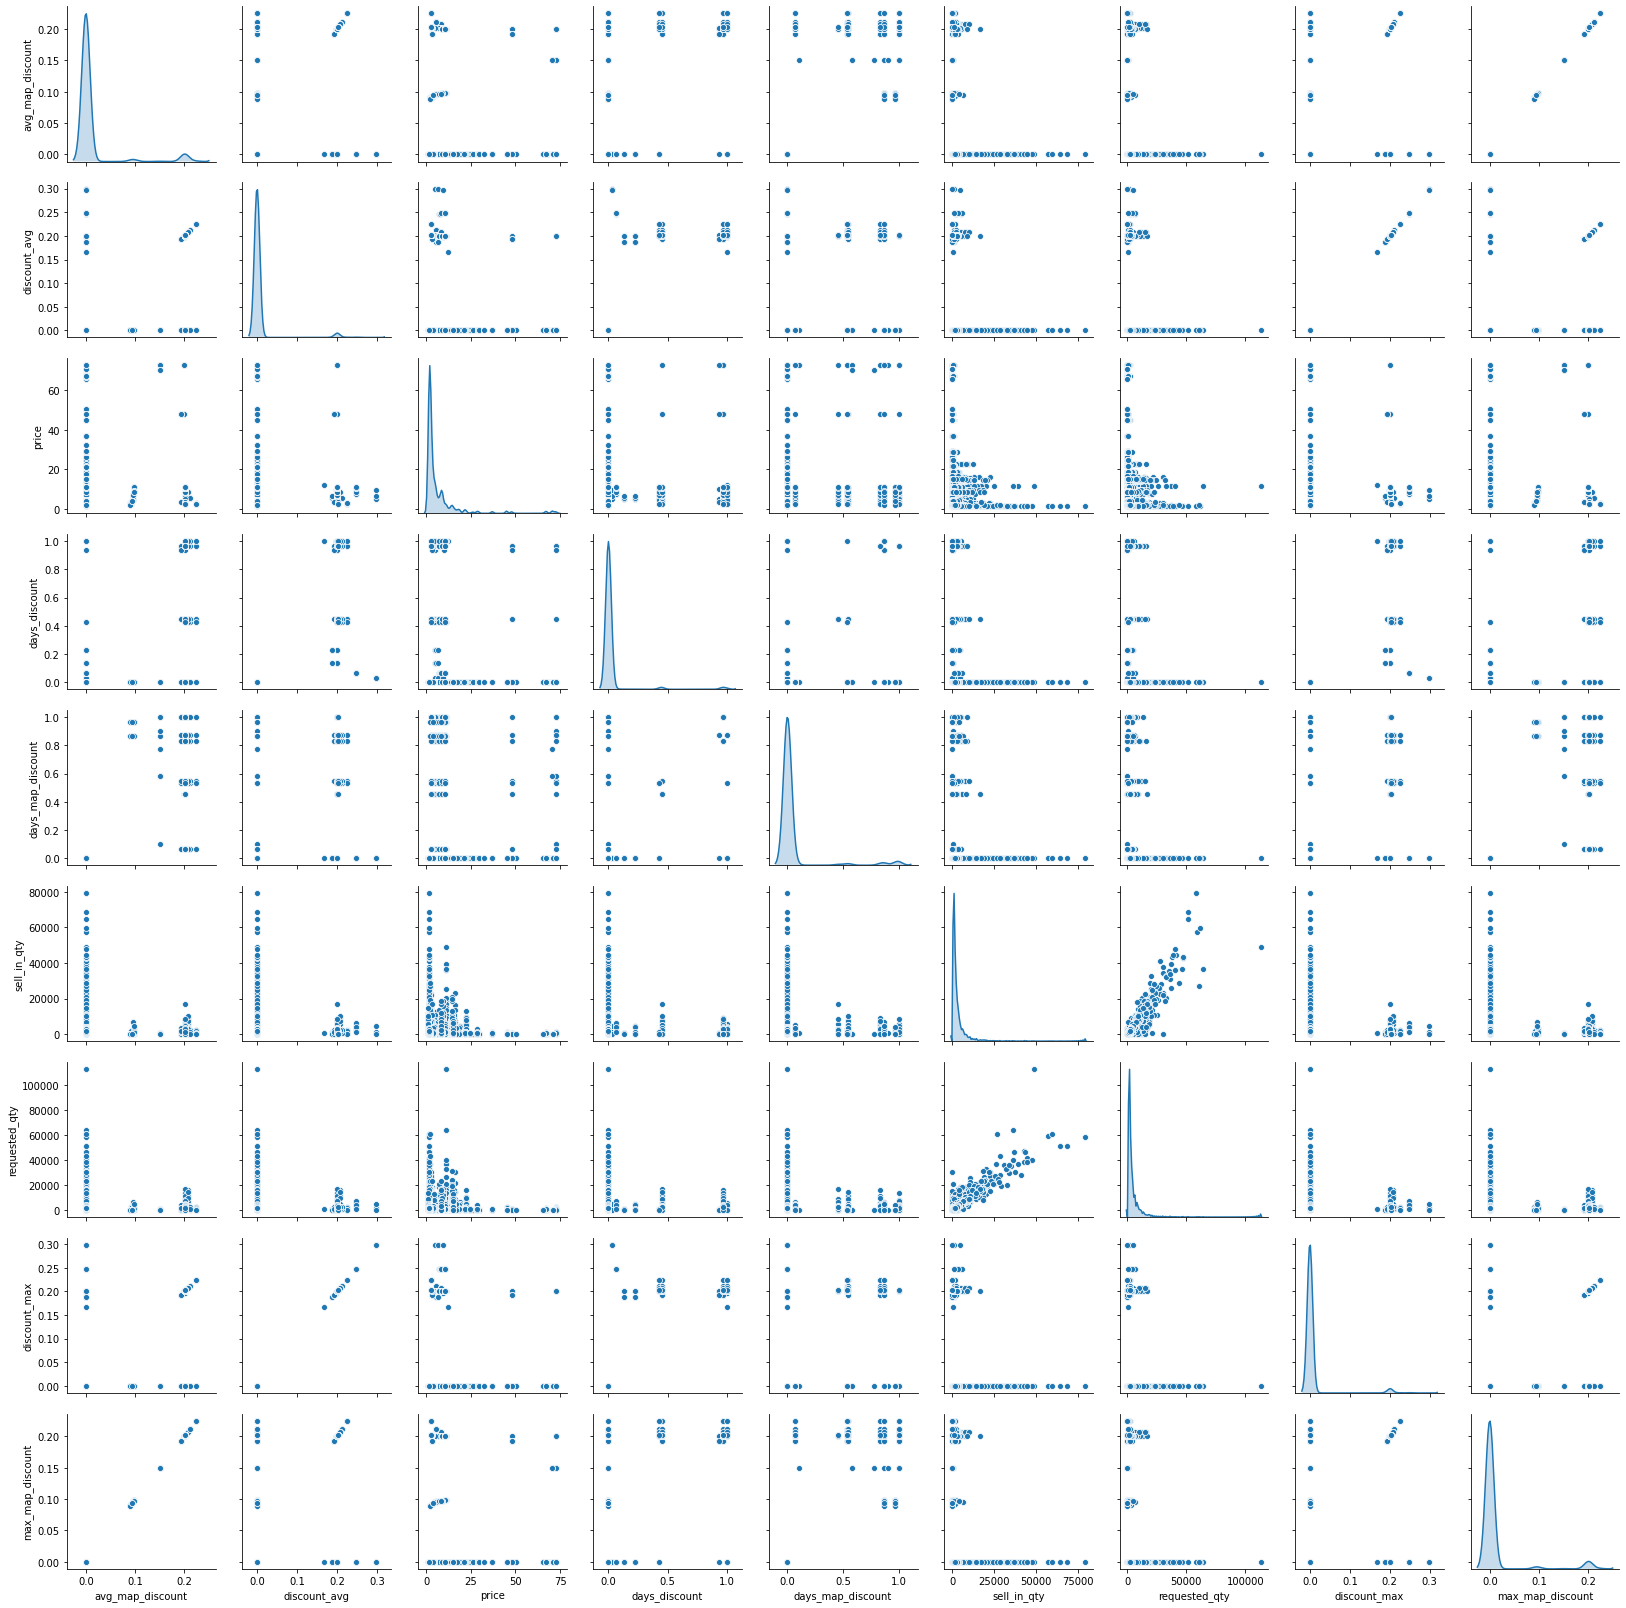

In [23]:
sns.pairplot(df.drop(["product_id","Product Group","month"],axis=1),diag_kind="kde")

### Sales for top level hierarchy

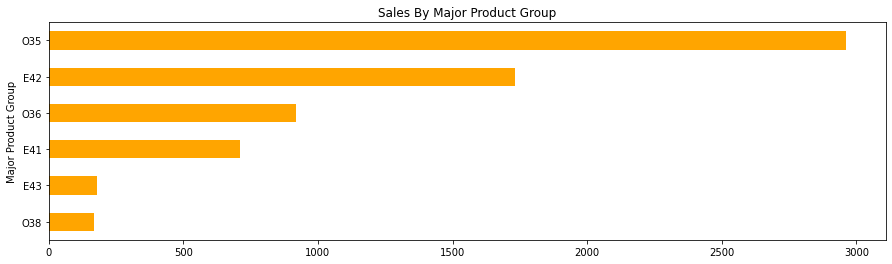

In [24]:
df.groupby('Major Product Group').count()['product_id'].sort_values().plot(kind='barh',figsize=(15,4), title='Sales By Major Product Group',width=0.5,color='orange')
plt.show()

### Sales for next level hierarchy

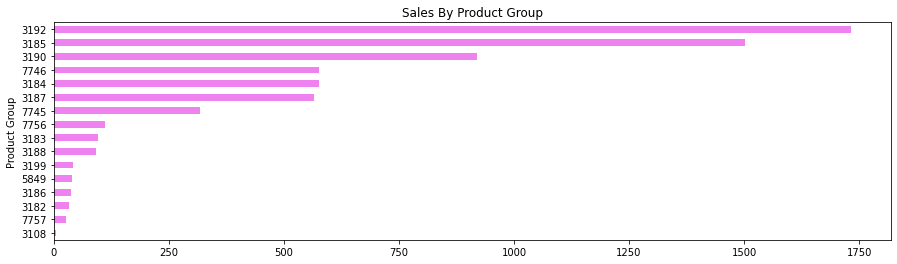

In [25]:
df.groupby('Product Group').count()['product_id'].sort_values().plot(kind='barh',figsize=(15,4), title='Sales By Product Group',width=0.5,color='violet')
plt.show()

### Requested quantities for some 20 random products

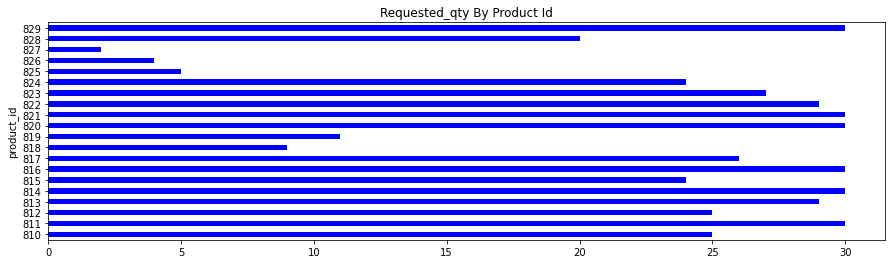

In [26]:
df.groupby('product_id').count()['requested_qty'][-30:-10].plot(kind='barh',figsize=(15,4), title='Requested_qty By Product Id',width=0.5,color='blue')
plt.show()

### Total Sales 
#### The total sales show the sum of requested quantity for all the products over all the dates.
#### This time series doesn't show a clear seasonality or trend.

Text(0, 0.5, 'Quantity')

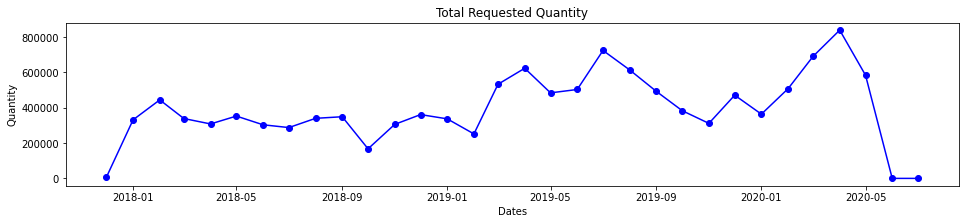

In [27]:
df_total = df.groupby("monthly_date")["requested_qty"] \
             .sum() \
             .to_frame() \
             .rename(columns={"requested_qty": "total"})
plt.rcParams['figure.figsize'] = (16, 3)

plt.plot(df_total["total"],color="b", marker="o")
plt.title("Total Requested Quantity")
plt.xlabel("Dates")
plt.ylabel("Quantity")

## Top level hierarchy

### Plotting the requested quantity across Major Product Group for different dates.

#### 1. It is observed that for different dates the requested quantity is different for every Major Product Group
#### 2.  The overall trend with respect of other Major Product groups although remains the same.

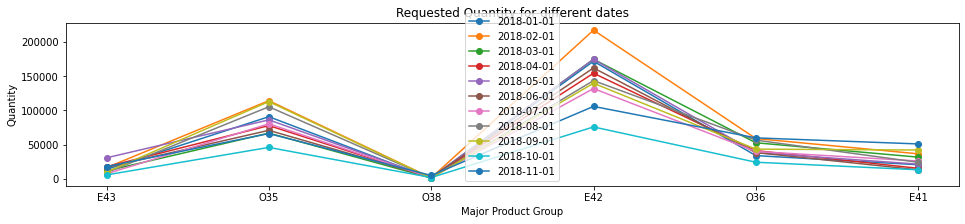

In [30]:
df_top_level = df.groupby(["monthly_date", "Major Product Group"]) \
                    .sum() \
                    .reset_index(drop=False) \
                    .pivot(index="monthly_date", columns="Major Product Group", values="requested_qty")
ii=df["Major Product Group"].unique()
ii=[str(e) for e in ii]
df_top_level.columns=ii
df_top_level=df_top_level.fillna(0)
plt.rcParams['figure.figsize'] = (16, 3)
c=['r','k','b','c','m','b','k','b','c','m','r','k','b','c','m','b','k','b','c','m','r','k','b','c','m','b','k','b','c','m','r','k','b','c','m','b','k','b','c','m']
for i in range(1,len(df_top_level.index)-20):
    plt.plot(df_top_level.columns,df_top_level.iloc[i:i+1,:].values[0], marker = 'o',label=str(df_top_level.index[i].date()))
    plt.title("Requested Quantity for different dates")
    plt.legend()
    plt.xlabel("Major Product Group")
    plt.ylabel("Quantity")
    #plt.show()

### Plotting the requested quantity across different dates for each Major Product Groups.
#### 1. The time series of each Major Product Group doesn't show any clear similarity with the time series of other Major product group.
#### 2. The time series at this level is not intermittent.

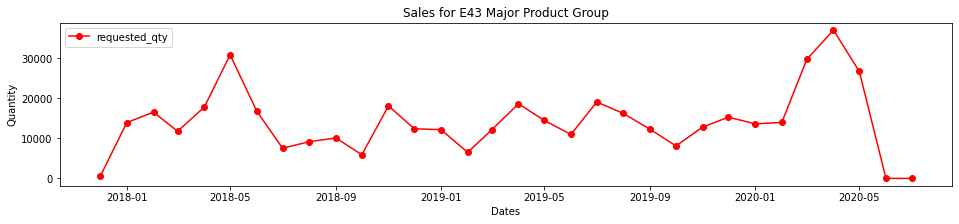

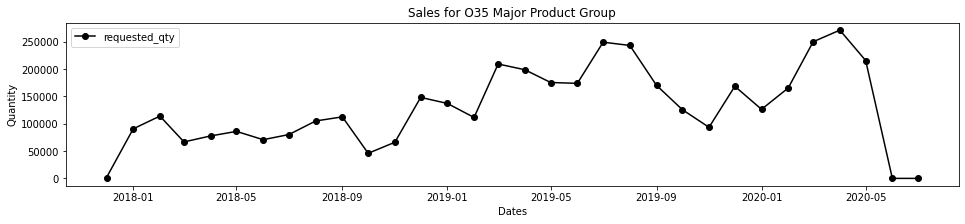

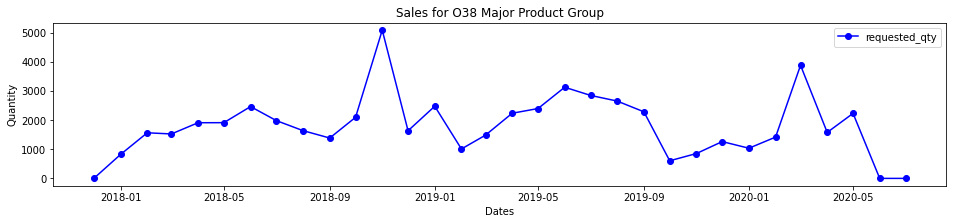

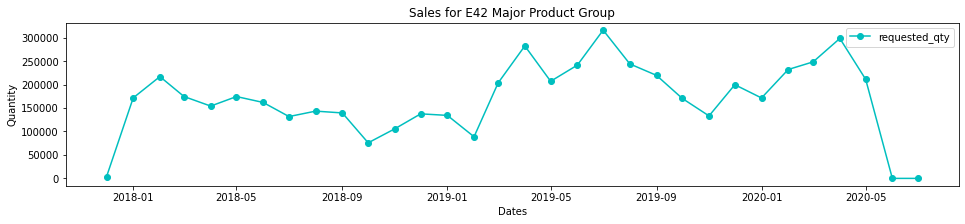

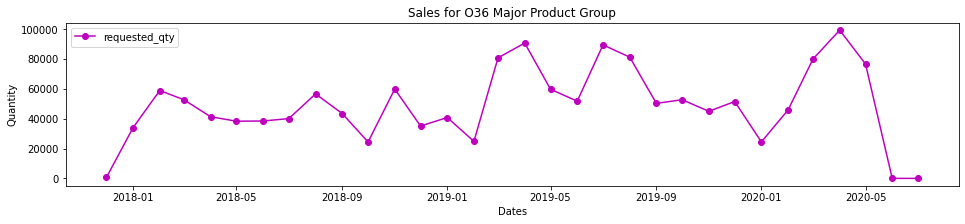

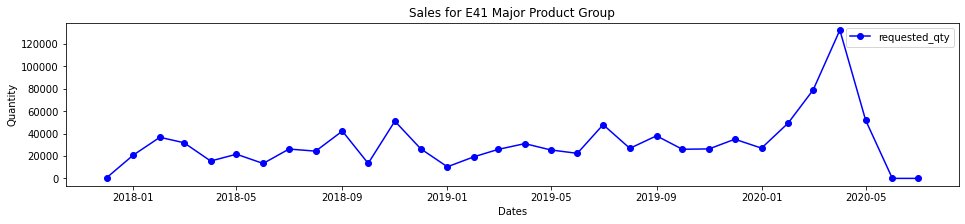

In [31]:
for i in range(len(df_top_level.columns)):
    plt.plot(df_top_level.index,df_top_level.iloc[:,i:i+1].values, marker = 'o',color=c[i],label="requested_qty")
    plt.title("Sales for "+ df_top_level.columns[i]+" Major Product Group")
    plt.legend()
    plt.xlabel("Dates")
    plt.ylabel("Quantity")
    plt.show()

## Middle level hierarchy values

### Plotting everyday required quantity for different Product Groups

#### The required quantity for each Product Group chages with time and is not the same but follows a similar trend with respect to other Product group; symbolic of the fact that the demand of certain products is more than the other.

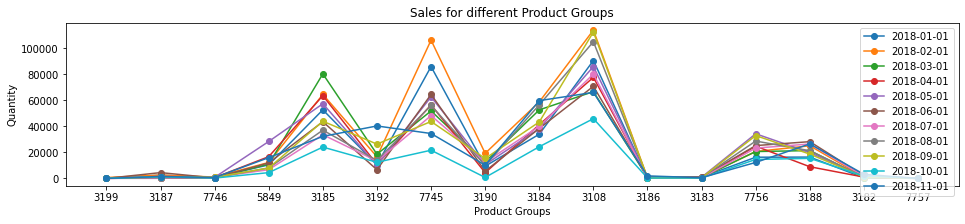

In [32]:
df_middle_level = df.groupby(["monthly_date", "Product Group"]) \
                    .sum() \
                    .reset_index(drop=False) \
                    .pivot(index="monthly_date", columns="Product Group", values="requested_qty")
i=df["Product Group"].unique()
i=[str(e) for e in i]
df_middle_level.columns=i
df_middle_level=df_middle_level.fillna(0)
plt.rcParams['figure.figsize'] = (16, 3)
c=['r','k','b','c','m','b','k','b','c','m','r','k','b','c','m','b','k','b','c','m','r','k','b','c','m','b','k','b','c','m','r','k','b','c','m','b','k','b','c','m']
for i in range(1,len(df_middle_level.index)-20):
    plt.plot(df_middle_level.columns,df_middle_level.iloc[i:i+1,:].values[0], marker = 'o',label=str(df_middle_level.index[i].date()))
    plt.title("Sales for different Product Groups")
    plt.legend()
    plt.xlabel("Product Groups")
    plt.ylabel("Quantity")
    

### Plotting the requested quantity across different dates for each product Group

#### 1. At this level of hierarchy the time series has started becoming more intermittent.
#### 2. This time series shows that the demand of certain Product Groups like ***"7757"*** and ***"3199"*** is rare and is not zero for most of the months.

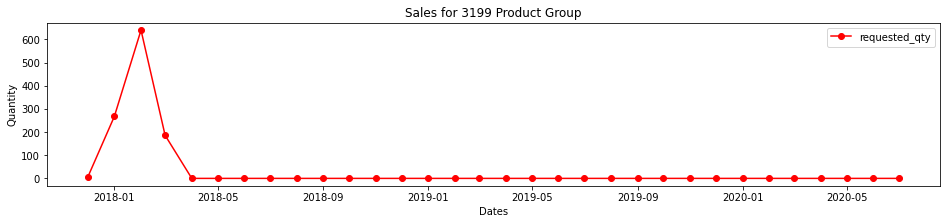

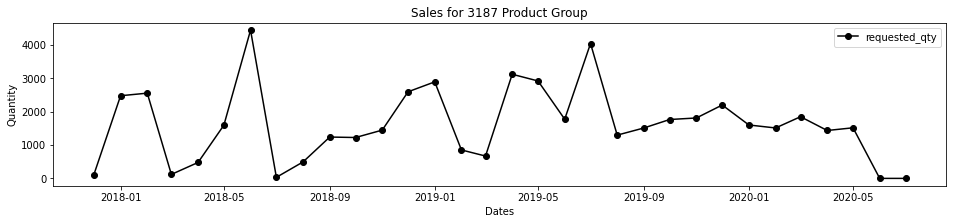

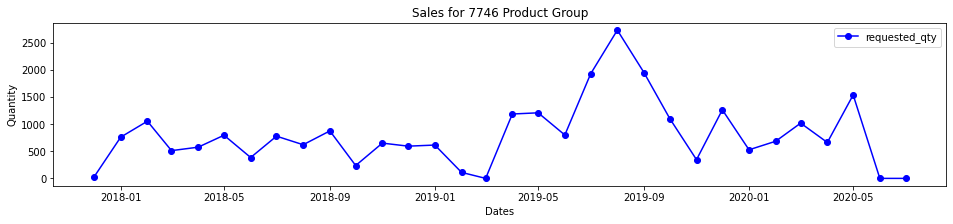

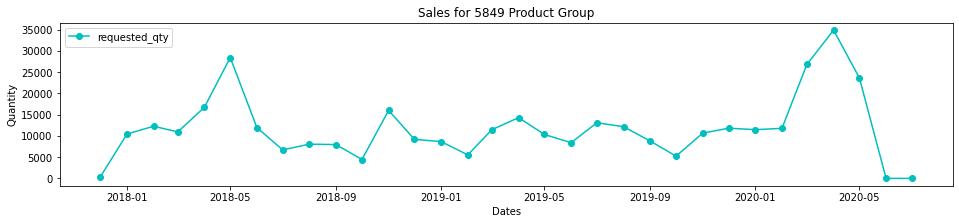

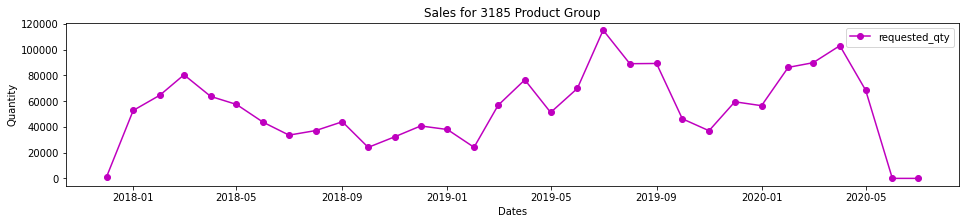

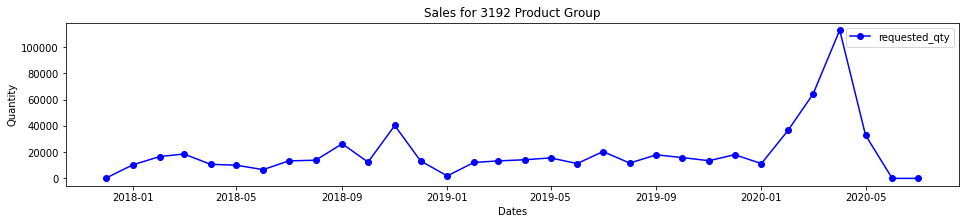

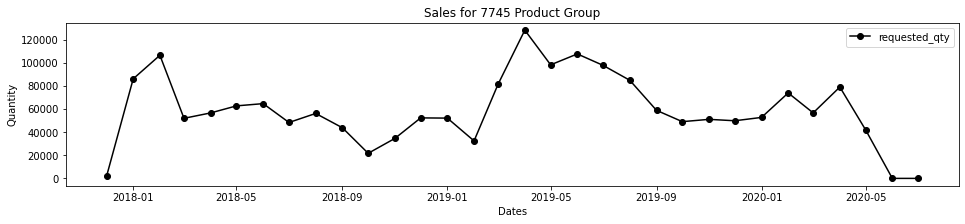

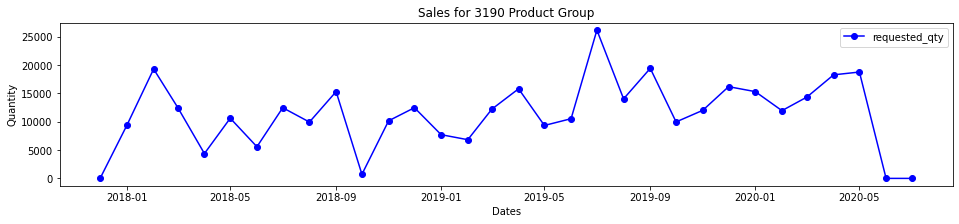

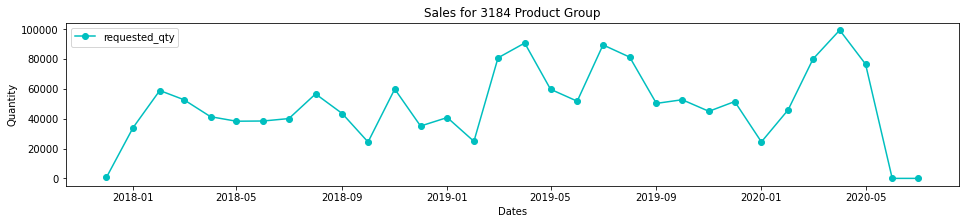

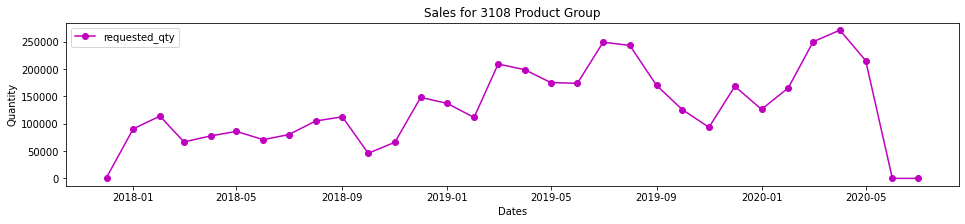

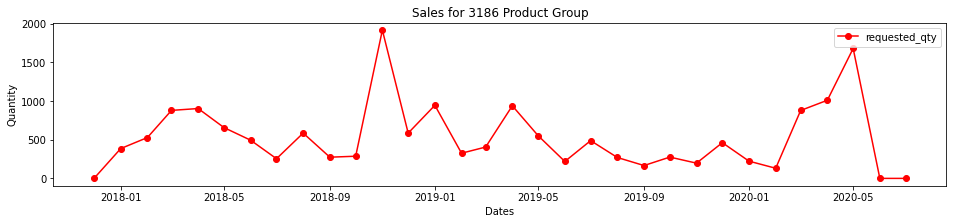

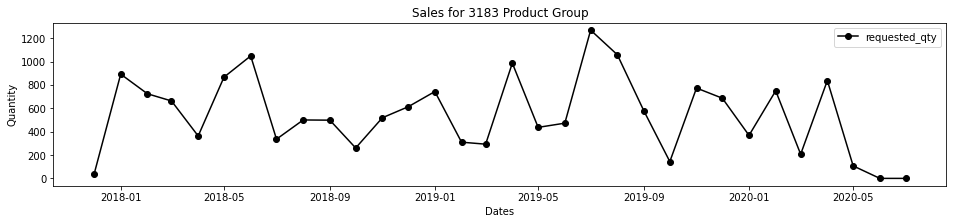

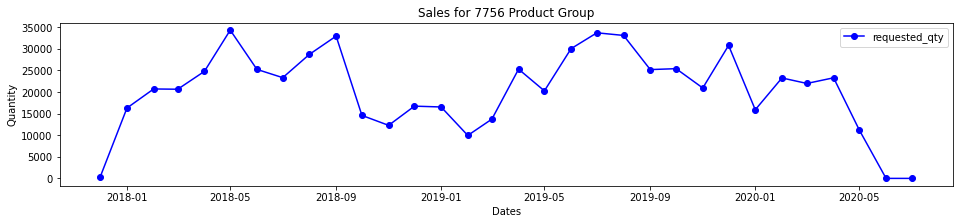

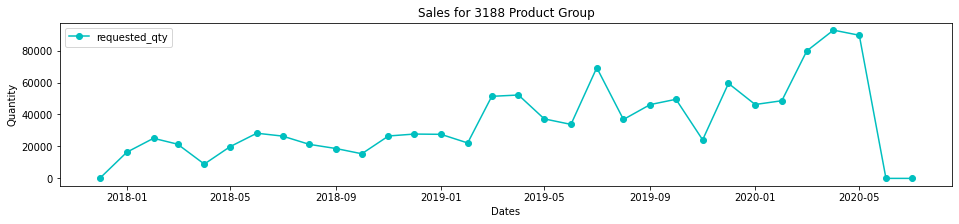

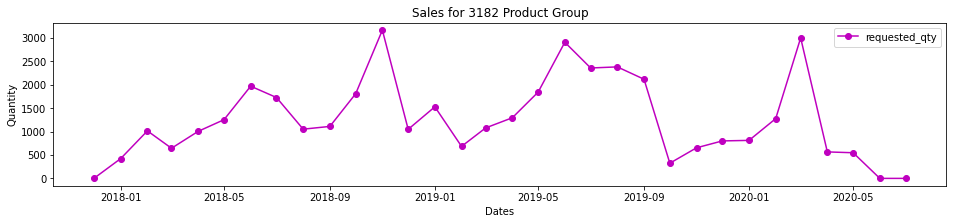

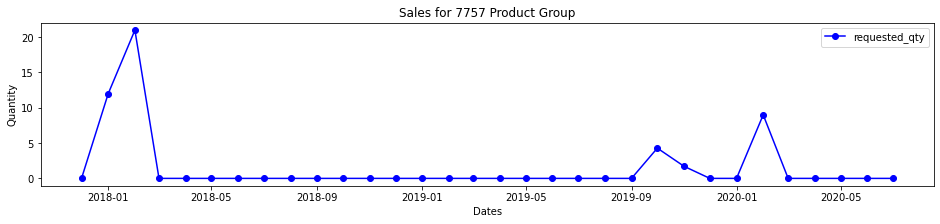

In [33]:
for i in range(len(df_middle_level.columns)):
    plt.plot(df_middle_level.index,df_middle_level.iloc[:,i:i+1].values, marker = 'o',color=c[i],label="requested_qty")
    plt.title("Sales for "+ df_middle_level.columns[i]+" Product Group")
    plt.legend()
    plt.xlabel("Dates")
    plt.ylabel("Quantity")
    plt.show()

## Lower level of the hierarchy has intermittent values
### Plotting the requested quantity across different product_ids for all dates.
#### At this level we observe that some products have a very less demand over all the plotted months.

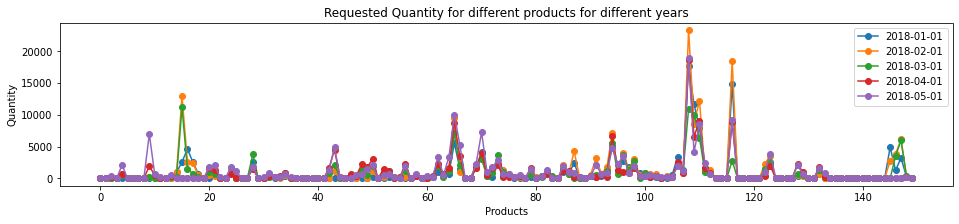

In [34]:
df_bottom_level = df.pivot(index="monthly_date", columns="product_id", values=["requested_qty"])
ids=df["product_id"].unique()
ids=[str(e) for e in ids]
df_bottom_level.columns=ids
df_bottom_level=df_bottom_level.fillna(0)
plt.rcParams['figure.figsize'] = (16, 3)
c=['r','k','b','c','m']
for i in range(1,6):
    plt.plot(df_bottom_level.iloc[i:i+1,:150].values[0], marker = 'o',label=str(df_bottom_level.index[i].date()))
    plt.title("Requested Quantity for different products for different years")
    plt.legend()
    plt.xlabel("Products")
    plt.ylabel("Quantity")

### Plotting the requested quantity across different dates for each product_id
#### At this level the time series has become very intermittent and very less data is present for each product.

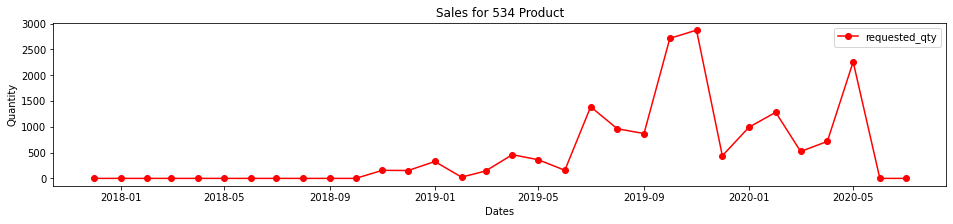

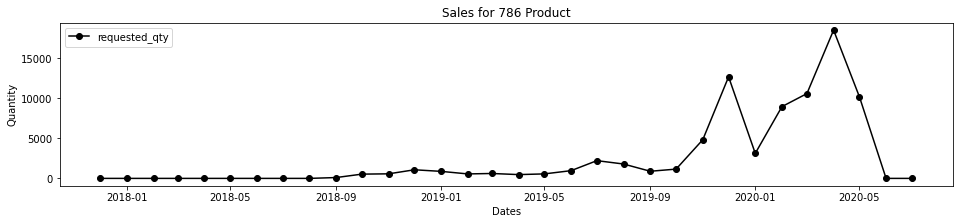

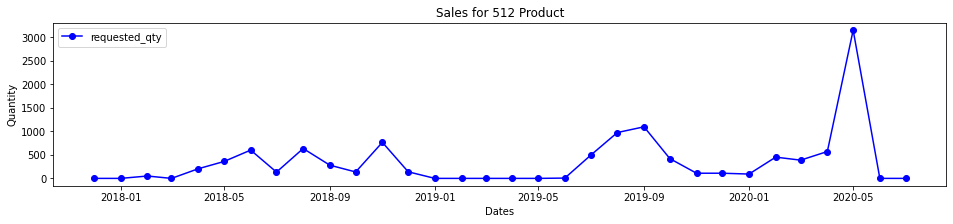

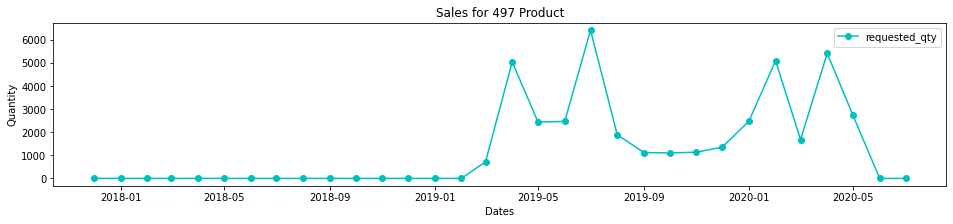

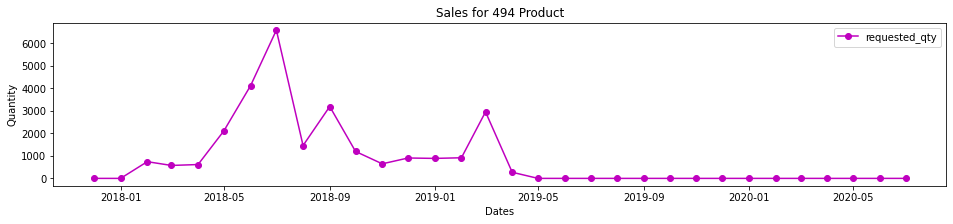

In [35]:
plt.rcParams['figure.figsize'] = (16, 3)
c=['r','k','b','c','m']
for i in range(5):
    plt.plot(df_bottom_level.index,df_bottom_level.iloc[:,i:i+1].values, marker = 'o',color=c[i],label="requested_qty")
    plt.title("Sales for "+ids[i]+" Product")
    plt.ylabel("Quantity")
    plt.xlabel("Dates")
    plt.legend()
    plt.show()

### Unique data at every level of hierarchy

In [36]:
hierarchy_df = df_bottom_level.join(df_middle_level).join(df_top_level).join(df_total)
hierarchy_df.index = pd.to_datetime(hierarchy_df.index)

print(f"Number of time series at the bottom level: {df_bottom_level.shape[1]}")
print(f"Number of time series at the middle level: {df_middle_level.shape[1]}")
print(f"Number of time series at the top level: {df_top_level.shape[1]}")


Number of time series at the bottom level: 335
Number of time series at the middle level: 16
Number of time series at the top level: 6


### Required quantity for all the Major Product Groups over the time

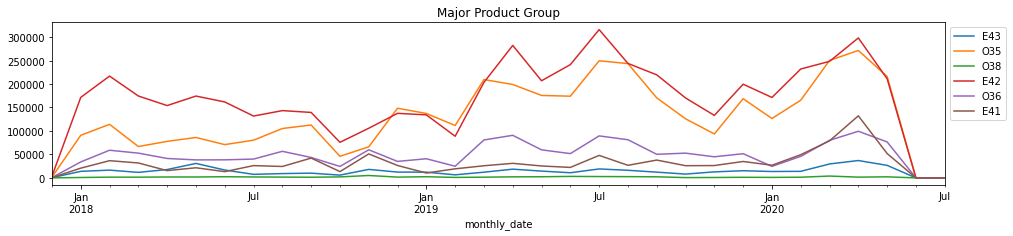

In [37]:
major=df["Major Product Group"].unique()
major=[str(e) for e in major]
ax = hierarchy_df[major].plot(title="Major Product Group")
ax.legend(bbox_to_anchor=(1.0, 1.0));

### Required quantity for all the Product Groups over the time

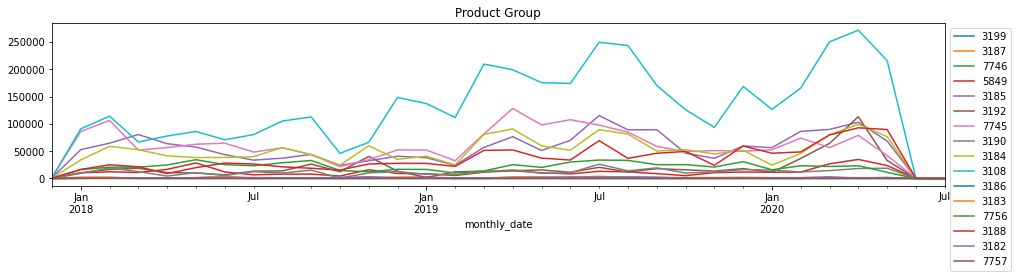

In [38]:
prod=df["Product Group"].unique()
prod= [str(e) for e in prod]
ax = hierarchy_df[prod].plot(title="Product Group")
ax.legend(bbox_to_anchor=(1.0, 1.0));

### Required quantity for all the Product Ids over the time

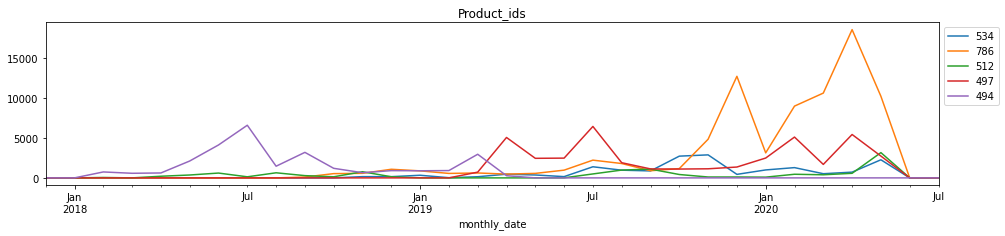

In [39]:
i=df["product_id"].unique()
ids=[str(e) for e in i]
ax = hierarchy_df[ids[:5]].plot(title="Product_ids")
ax.legend(bbox_to_anchor=(1.0, 1.0));

### Below is the hierarchy tree of the data.

In [40]:
from hts.hierarchy import HierarchyTree
maj = df["Major Product Group"].unique()
total = {'total': list(maj)}
m={}
for i in maj:
    tf=df[df["Major Product Group"]==i]
    pg=tf["Product Group"].unique()
    pg=[str(e) for e in pg]
    m[str(i)] = list(pg)
idss={}
for i in df["Product Group"].unique():
    tf=df[df["Product Group"]==i]
    pg=tf["product_id"].unique()
    pg=[str(e) for e in pg]
    idss[str(i)] = list(pg)
hierarchy = {**total, **m, **idss}
ht = HierarchyTree.from_nodes(nodes=hierarchy, df=hierarchy_df,root='total')
ht

- total
   |- E43
   |  |- 3199
   |  |  |- 534
   |  |  - 529
   |  |- 7756
   |  |  |- 527
   |  |  |- 526
   |  |  |- 525
   |  |  |- 533
   |  |  - 532
   |  - 7757
   |     |- 839
   |     - 535
   |- O35
   |  |- 3187
   |  |  |- 786
   |  |  |- 745
   |  |  |- 746
   |  |  |- 776
   |  |  |- 779
   |  |  |- 780
   |  |  |- 773
   |  |  |- 740
   |  |  |- 788
   |  |  |- 739
   |  |  |- 787
   |  |  |- 774
   |  |  |- 743
   |  |  |- 769
   |  |  |- 778
   |  |  |- 775
   |  |  |- 784
   |  |  |- 766
   |  |  |- 741
   |  |  |- 744
   |  |  |- 777
   |  |  |- 772
   |  |  |- 783
   |  |  |- 767
   |  |  |- 771
   |  |  |- 785
   |  |  |- 748
   |  |  |- 782
   |  |  |- 747
   |  |  |- 742
   |  |  |- 781
   |  |  - 768
   |  |- 7746
   |  |  |- 512
   |  |  |- 497
   |  |  |- 494
   |  |  |- 495
   |  |  |- 503
   |  |  |- 518
   |  |  |- 530
   |  |  |- 524
   |  |  |- 504
   |  |  |- 502
   |  |  |- 501
   |  |  |- 519
   |  |  |- 498
   |  |  |- 510
   |  |  |- 499
   |  |  |-

In [41]:
# Sorting the dataframe by the monthly_date
df = df.sort_values(by="monthly_date")

### Creating a column which has the month number from 0-31 corresponding to the 32 unique months data provides

In [45]:
df['month_number']  = 0
for i, item in enumerate(df['monthly_date']):
    start_date =  pd.to_datetime('2017-12-01')
    end_date = df['monthly_date'].iloc[i]
    df['month_number'].iloc[i] = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)

## Pivoting the dataframe
### Grouping the dataframe in a way where product_id is mapped to a month number. The columns here are the month numbers and rows are the product_ids and the dataframe is filled with the requested quantity values.

In [47]:
df_by_prod = df.groupby(["product_id", 'month_number']) \
                    .sum() \
                    .reset_index(drop=False) \
                    .pivot(index="product_id", columns="month_number", values="requested_qty")
df_by_prod.head()

month_number,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
product_id,,,,,,,,,,,,,,,,,,,,,
493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2713.714286,2873.142857,438.857143,992.571429,1280.571429,521.142857,716.571429,2259.428571,0.0,0.0
494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.571429,...,1158.428571,4824.000000,12681.000000,3125.142857,8960.857143,10586.857140,18510.285710,10189.714290,0.0,0.0
495,NaN,NaN,50.285714,0.000000,204.571429,359.428571,602.000000,133.714286,635.428571,280.857143,...,420.857143,110.000000,110.000000,92.000000,452.000000,388.000000,571.428571,3154.285714,0.0,0.0
496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1101.714286,1134.857143,1353.857143,2476.285714,5094.857143,1681.714286,5416.285714,2724.428571,0.0,0.0
497,NaN,NaN,741.000000,573.857143,613.714286,2106.000000,4108.285714,6572.142857,1457.142857,3186.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
## Creating a new column with the product_id and resetting the index
i=df_by_prod.index
j=[int(e) for e in i]
df_by_prod["product_id"]=j
df_by_prod.index=np.arange(335)

### Creating a temporary dataframe where each product id is mapped with it's corresponding Major Product Group and Product Group.

In [49]:
temp=pd.DataFrame()
temp["product_id"]=df['product_id'].unique()
m,p=[],[]
for i in df['product_id'].unique():
    t_f=df[df["product_id"]==i]
    mp=t_f["Major Product Group"].unique()
    pg=t_f["Product Group"].unique()
    m.append(mp[0])
    p.append(pg[0])
    
temp["Major Product Group"]=m
temp["Product Group"]=p

temp.head()

,product_id,Major Product Group,Product Group
0,527,E43,7756
1,676,E41,3183
2,586,E42,3192
3,522,O35,7746
4,820,O36,3190


### Merging the above two dataframes and filling the nan values with 0. Since, our assumption is that the nan values are symbolic of no sale.

In [50]:
df_prod_grp = pd.merge(df_by_prod, temp ,how='inner', on=['product_id'])
df_prod_grp=df_prod_grp.fillna(0)
df_prod_grp.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,product_id,Major Product Group,Product Group
0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,992.571429,1280.571429,521.142857,716.571429,2259.428571,0.0,0.0,493,O35,7746
1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,104.571429,...,3125.142857,8960.857143,10586.857140,18510.285710,10189.714290,0.0,0.0,494,O35,7746
2,0.0,0.0,50.285714,0.000000,204.571429,359.428571,602.000000,133.714286,635.428571,280.857143,...,92.000000,452.000000,388.000000,571.428571,3154.285714,0.0,0.0,495,O35,7746
3,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2476.285714,5094.857143,1681.714286,5416.285714,2724.428571,0.0,0.0,496,O35,7746
4,0.0,0.0,741.000000,573.857143,613.714286,2106.000000,4108.285714,6572.142857,1457.142857,3186.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,497,O35,7746


## Melting Dataframe
### Since the above pivoted data frame is sparse it is melted and the row for each columns is aggregated under one column "required_qty". Doing this the required quantity for every product for every month is obtained.

In [51]:
train_sales =df_prod_grp.melt(['product_id','Major Product Group','Product Group'], var_name='month_number', value_name='required_qty')
print(train_sales.shape)
train_sales.head()

(10720, 5)


,product_id,Major Product Group,Product Group,month_number,required_qty
0,493,O35,7746,0,0.0
1,494,O35,7746,0,0.0
2,495,O35,7746,0,0.0
3,496,O35,7746,0,0.0
4,497,O35,7746,0,0.0


### Merging the created dataframe with original dataframe to add other features in the main dataframe.

In [52]:
del df["requested_qty"]
del df["monthly_date"]
df_train = pd.merge(train_sales, df ,how='left', on=['product_id','Major Product Group','Product Group','month_number'])

### Creating a new column sell_shifted which has the previous two month "sell_in_qty" mapped to current month.

In [53]:
# Filling the missing values with 0
df_train=df_train.fillna(0)
# saving the sell_in_qty
sq=df_train["sell_in_qty"]
# Deleting the data for first two month in data
df_train=df_train[670:]
# Resetting the index after trimming the dataframe
df_train.index=np.arange(len(df_train))
# Creating a new column in the dataframe with 2 months past values of sell_in_qty
df_train["sell_shifted"]=sq
df_train.head()

,product_id,Major Product Group,Product Group,month_number,required_qty,month,avg_map_discount,discount_avg,price,days_discount,days_map_discount,sell_in_qty,discount_max,max_map_discount,sell_shifted
0,493,O35,7746,2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,494,O35,7746,2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,495,O35,7746,2,50.285714,2.0,0.0,0.0,11.966535,0.0,0.0,50.285714,0.0,0.0,0.0
3,496,O35,7746,2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,497,O35,7746,2,741.000000,2.0,0.0,0.0,17.447462,0.0,0.0,258.428571,0.0,0.0,0.0


### Saving the data of the months for which we need forecast in test_forecast

In [54]:
f_frame=df_train
df_train=df_train[:-670]
test_forecast=f_frame[-670:]
test_forecast.head()

,product_id,Major Product Group,Product Group,month_number,required_qty,month,avg_map_discount,discount_avg,price,days_discount,days_map_discount,sell_in_qty,discount_max,max_map_discount,sell_shifted
9380,493,O35,7746,30,0.0,6.0,0.0,0.0,7.185307,0.0,0.0,0.0,0.0,0.0,716.571429
9381,494,O35,7746,30,0.0,6.0,0.0,0.0,7.252670,0.0,0.0,0.0,0.0,0.0,4955.571429
9382,495,O35,7746,30,0.0,6.0,0.0,0.0,11.966535,0.0,0.0,0.0,0.0,0.0,911.857143
9383,496,O35,7746,30,0.0,6.0,0.0,0.0,18.720127,0.0,0.0,0.0,0.0,0.0,4290.857143
9384,497,O35,7746,30,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [67]:

#cols = df_train.columns
# target column is the column to be predicted
target_col = 'required_qty'
# exclude column has columns which are to be dropped.
exclude_cols = ['required_qty','sell_in_qty']
feature_cols = [col for col in df_train.columns if col not in exclude_cols]

# Creating the arrays of features and labels
y = np.array(df_train[target_col])
X = np.array(df_train[feature_cols])

# The final data for which we need to predict the label
test_new = np.array(test_forecast[feature_cols]) 

#Randomly splitting the test and train data
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=1234)

### Creating the categorical data for 'Major Product Group', 'Product Group', 'month' features to be fed in the model.

In [68]:
X_train = pd.DataFrame(X_train, columns = feature_cols)

X_test = pd.DataFrame(X_test, columns = feature_cols)
test_new = pd.DataFrame(test_new, columns = feature_cols)

cat_col = ['Major Product Group', 'Product Group', 'month','product_id','month_number']

for item in cat_col:
    X_train[item]= X_train[item].astype('category')
for item in cat_col:
    X_test[item]= X_test[item].astype('category')    
for item in cat_col:
    test_new[item]= test_new[item].astype('category')    
for item in feature_cols:
    if item not in cat_col: 
            X_train[item]= X_train[item].astype(float)
            X_test[item]= X_test[item].astype(float)
            test_new[item]= test_new[item].astype(float)


### Training the lightgbm model  with the created dataset.

In [69]:
import lightgbm as lgb


lgb_train = lgb.Dataset(X_train, y_train, categorical_feature = cat_col)
lgb_eval = lgb.Dataset(X_test, y_test, categorical_feature = cat_col)

params = {
    'boosting_type': 'gbdt',
    'metric': 'rmse',
    'objective': 'regression',
    'n_jobs': -1,
    'seed': 236,
    'learning_rate': 0.01,
    'bagging_fraction': 0.75,
    'bagging_freq': 10, 
    'colsample_bytree': 0.75, 'verbose': -1}

model = lgb.train(params, lgb_train, num_boost_round=2500, early_stopping_rounds=50, valid_sets = [lgb_train, lgb_eval])

[1]	training's rmse: 3811.4	valid_1's rmse: 3517.19
Training until validation scores don't improve for 50 rounds
[2]	training's rmse: 3789.89	valid_1's rmse: 3498.26
[3]	training's rmse: 3768.7	valid_1's rmse: 3479.56
[4]	training's rmse: 3747.79	valid_1's rmse: 3461.21
[5]	training's rmse: 3732	valid_1's rmse: 3445.87
[6]	training's rmse: 3711.6	valid_1's rmse: 3428.04
[7]	training's rmse: 3691.51	valid_1's rmse: 3410.4
[8]	training's rmse: 3671.97	valid_1's rmse: 3392.89
[9]	training's rmse: 3652.3	valid_1's rmse: 3375.71
[10]	training's rmse: 3633.23	valid_1's rmse: 3358.64
[11]	training's rmse: 3615.02	valid_1's rmse: 3341.32
[12]	training's rmse: 3596.37	valid_1's rmse: 3323.05
[13]	training's rmse: 3578.63	valid_1's rmse: 3306.14
[14]	training's rmse: 3561.14	valid_1's rmse: 3287.89
[15]	training's rmse: 3543.21	valid_1's rmse: 3270.27
[16]	training's rmse: 3525.58	valid_1's rmse: 3252.98
[17]	training's rmse: 3508.23	valid_1's rmse: 3236
[18]	training's rmse: 3491.15	valid_1's r

[224]	training's rmse: 2233.05	valid_1's rmse: 2139.64
[225]	training's rmse: 2231.2	valid_1's rmse: 2138.66
[226]	training's rmse: 2229.26	valid_1's rmse: 2137.62
[227]	training's rmse: 2227.16	valid_1's rmse: 2136.48
[228]	training's rmse: 2225.1	valid_1's rmse: 2135.39
[229]	training's rmse: 2224.19	valid_1's rmse: 2134.77
[230]	training's rmse: 2222.87	valid_1's rmse: 2134.14
[231]	training's rmse: 2221.1	valid_1's rmse: 2133.51
[232]	training's rmse: 2219.42	valid_1's rmse: 2133.01
[233]	training's rmse: 2218.72	valid_1's rmse: 2132.63
[234]	training's rmse: 2216.92	valid_1's rmse: 2132.12
[235]	training's rmse: 2214.58	valid_1's rmse: 2132.07
[236]	training's rmse: 2212.88	valid_1's rmse: 2131.63
[237]	training's rmse: 2210.5	valid_1's rmse: 2131.59
[238]	training's rmse: 2208.93	valid_1's rmse: 2130.82
[239]	training's rmse: 2207.37	valid_1's rmse: 2130.49
[240]	training's rmse: 2205.48	valid_1's rmse: 2129.35
[241]	training's rmse: 2204.23	valid_1's rmse: 2129.18
[242]	training

[374]	training's rmse: 2041.15	valid_1's rmse: 2086.09
[375]	training's rmse: 2039.46	valid_1's rmse: 2086.22
[376]	training's rmse: 2037.57	valid_1's rmse: 2086.22
[377]	training's rmse: 2036.24	valid_1's rmse: 2086.69
[378]	training's rmse: 2033.96	valid_1's rmse: 2086.52
[379]	training's rmse: 2033.08	valid_1's rmse: 2086.42
[380]	training's rmse: 2031.2	valid_1's rmse: 2086.59
[381]	training's rmse: 2030.97	valid_1's rmse: 2086.44
[382]	training's rmse: 2030.18	valid_1's rmse: 2086.45
[383]	training's rmse: 2028.97	valid_1's rmse: 2086.23
[384]	training's rmse: 2028.15	valid_1's rmse: 2086.2
[385]	training's rmse: 2027.4	valid_1's rmse: 2086.29
[386]	training's rmse: 2026.37	valid_1's rmse: 2086.16
[387]	training's rmse: 2025.19	valid_1's rmse: 2086.57
[388]	training's rmse: 2024.52	valid_1's rmse: 2086.64
[389]	training's rmse: 2023.54	valid_1's rmse: 2086.58
[390]	training's rmse: 2022.84	valid_1's rmse: 2086.49
[391]	training's rmse: 2022.13	valid_1's rmse: 2086.66
[392]	trainin

### Plotting the features which add the most information to the lightgbm model

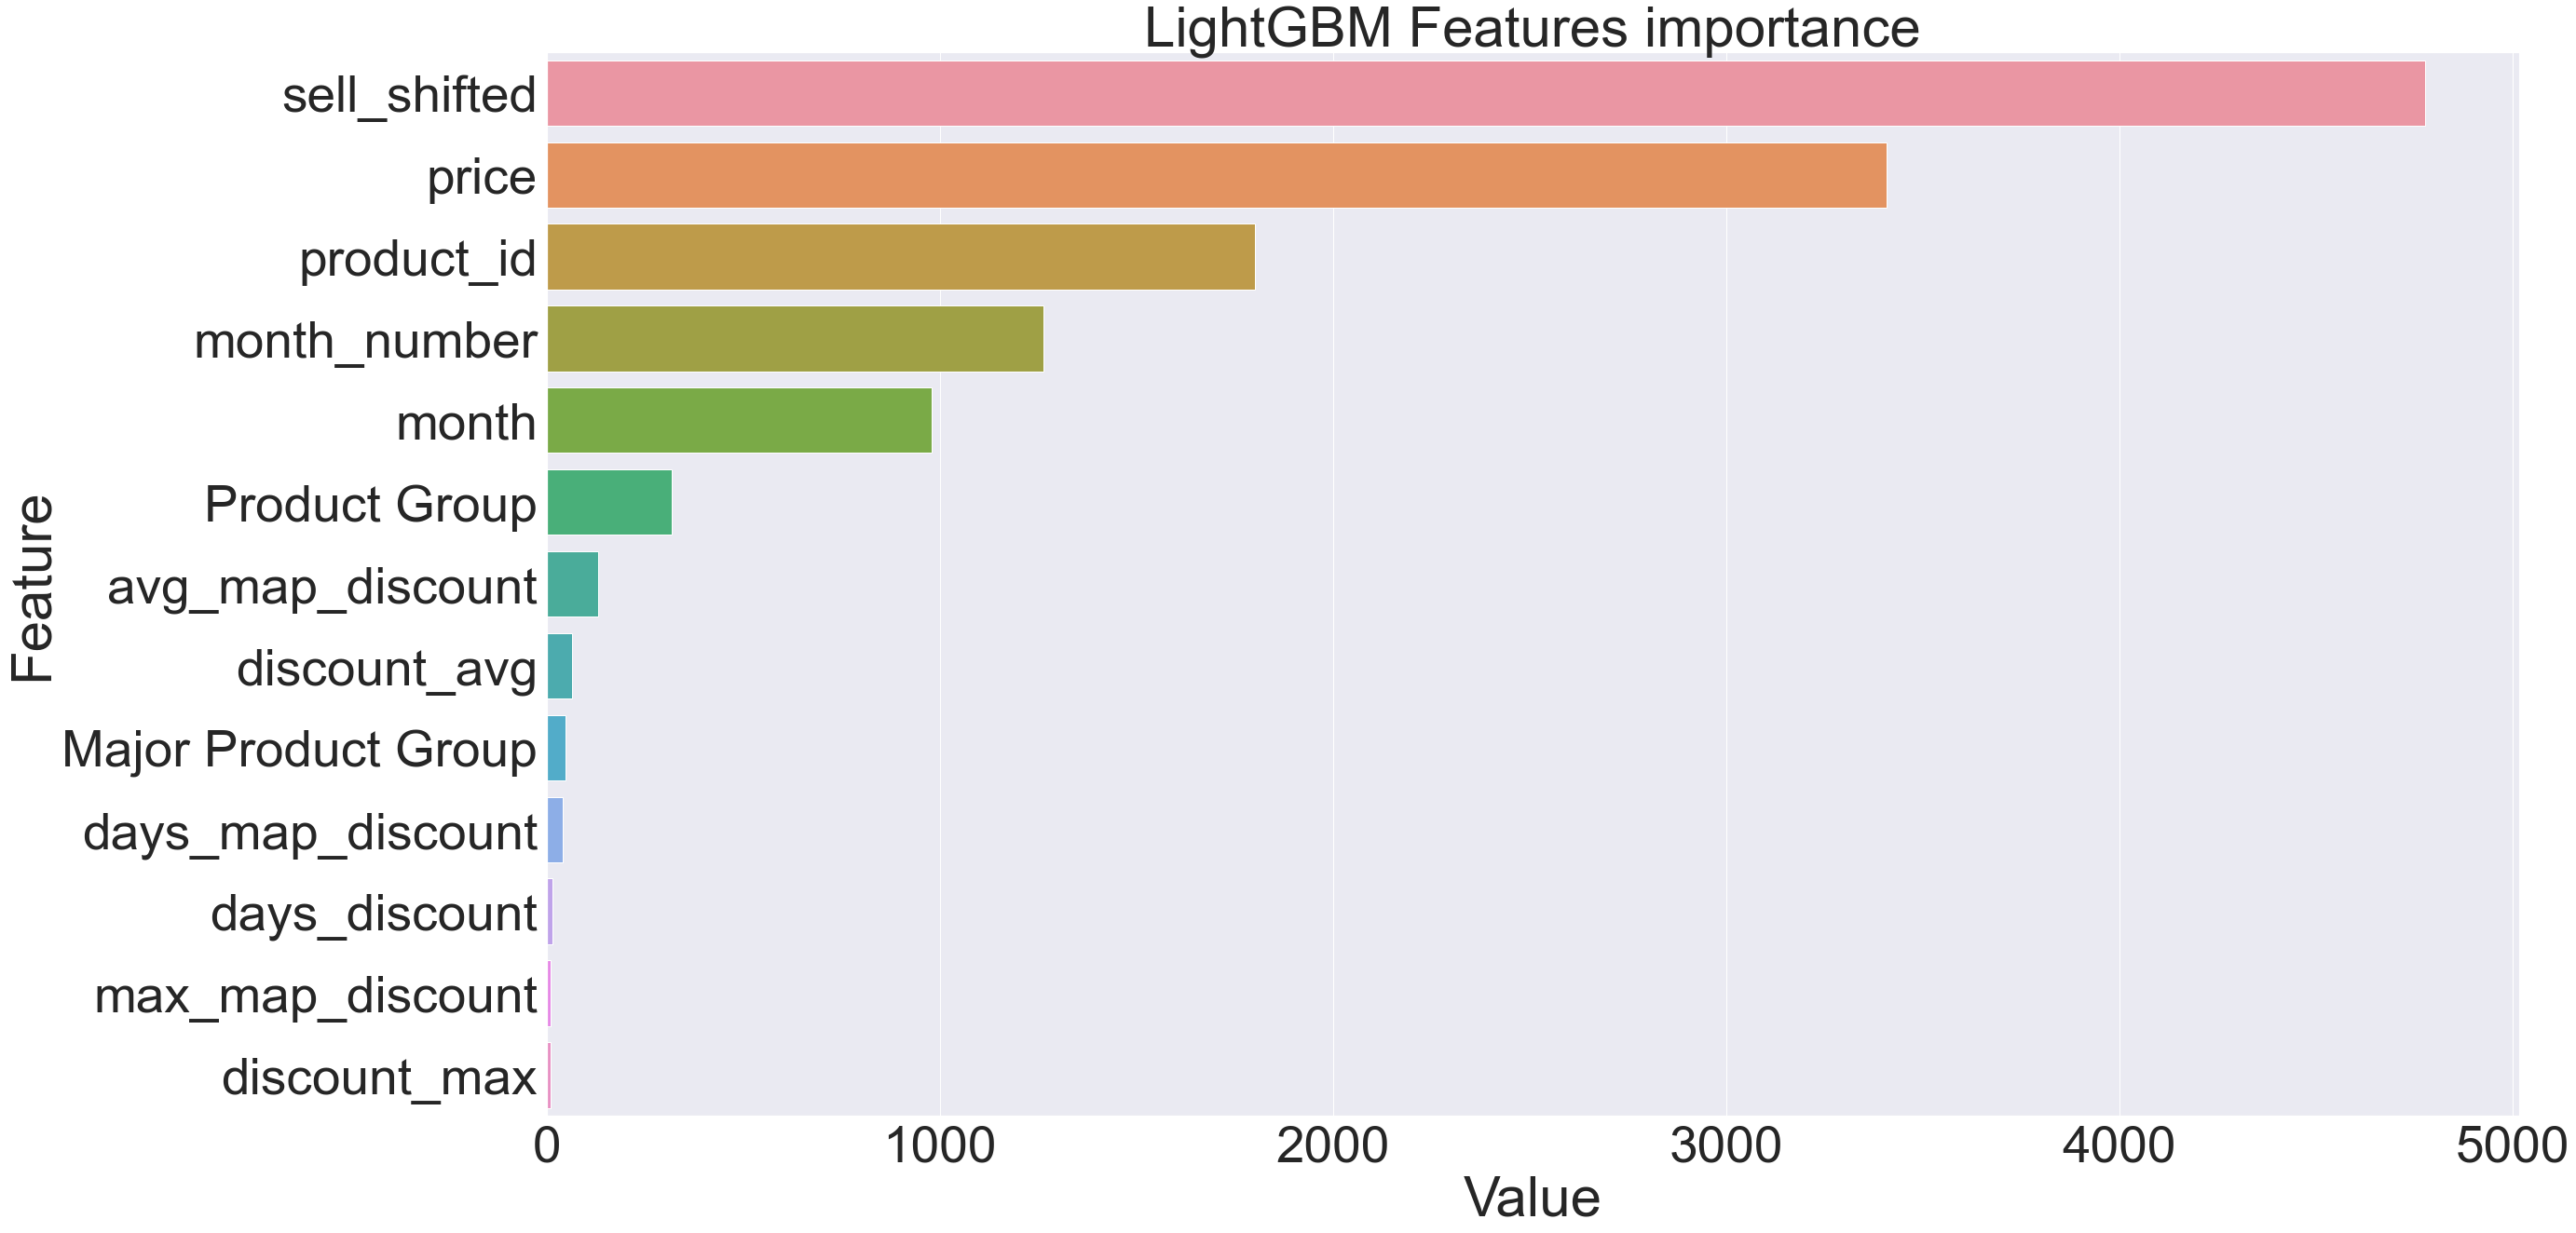

In [70]:
def plotImp(model, feature_cols , num = 20, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature': feature_cols})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features importance')
    plt.tight_layout()
    plt.show()
plotImp(model, feature_cols)

### Model Predictions 

In [71]:
def negative_by_zero(forecast):
    for i, item in enumerate(forecast):
        if item <0:
            forecast[i] = 0
    return forecast
# Predicting for test set
pred = model.predict(X_test)
# Replacing the negatively predicted values with 0
pred=negative_by_zero(pred)
# Forecasting values for 6th and 7th month of 2020
forecast=model.predict(test_new)
# Replacing the negatively forecasted values with zero
forecast=negative_by_zero(forecast)

## Plotting the predicted and true values of the test set

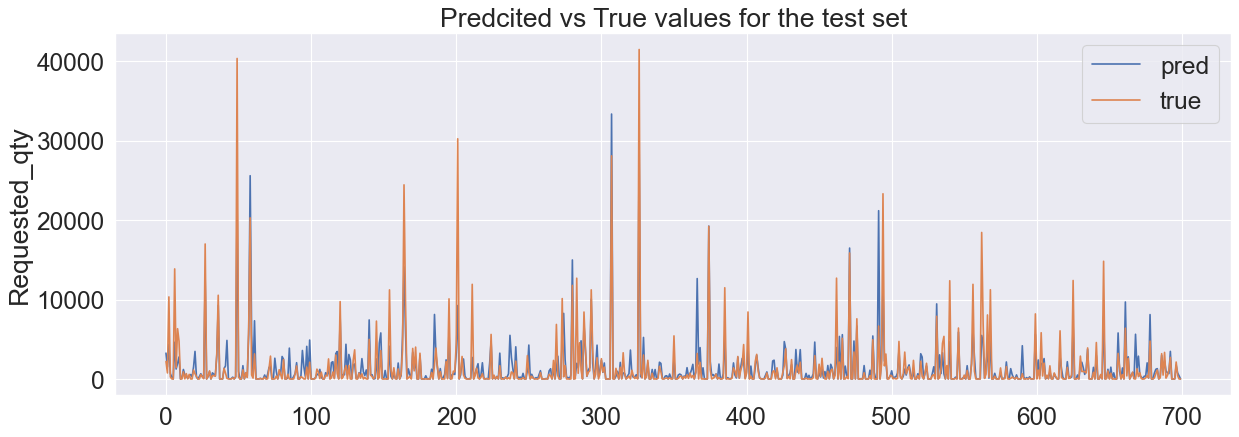

In [72]:
from matplotlib.pyplot import figure
sns.set(font_scale = 2)
figure(figsize=(18, 6), dpi=80)
plt.plot(pred[-700:],label="pred")
plt.plot(y_test[-700:],label="true")
plt.title("Predcited vs True values for the test set")
plt.ylabel("Requested_qty")
plt.legend()
plt.show()

## The MAE, RMSE, R2 and Aggregated Measure of the predicted data is following:

In [73]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

print("Mean Absolute Error is",mae(y_test,pred))
print("Root Mean Squared Error is",np.sqrt(mse(y_test,pred)))
print("R2 score is",r2_score(y_test,pred))
print("Aggregated Measure is ", (mae(y_test,pred)+np.sqrt(mse(y_test,pred))/2)*(1-r2_score(y_test,pred)))

Mean Absolute Error is 780.8717030948758
Root Mean Squared Error is 2078.557098711053
R2 score is 0.6545057152881609
Aggregated Measure is  628.851509538425


## Plotting the values for May 2020 (given), forecasted values for June, 2020 and July 2020.

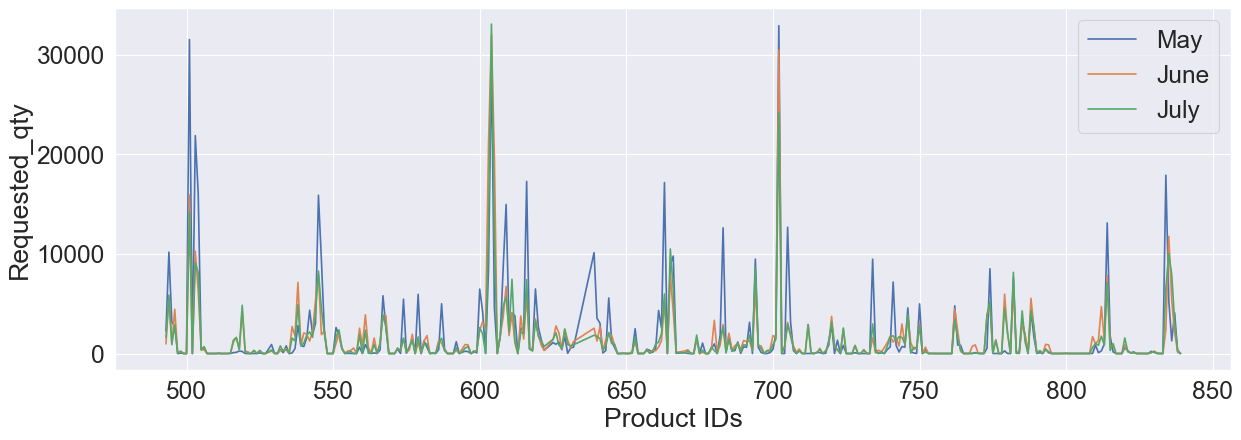

In [75]:
sns.set(font_scale = 2)
figure(figsize=(18, 6), dpi=80)
sorted_ids=np.sort(df["product_id"].unique())
may_for=df_train["required_qty"][-335:]
plt.plot(sorted_ids,may_for.values,label="May")
plt.plot(sorted_ids,forecast[:-335],label="June")
plt.plot(sorted_ids,forecast[-335:],label="July")
plt.ylabel("Requested_qty")
plt.xlabel("Product IDs")
plt.legend()

### Forecast for June and July

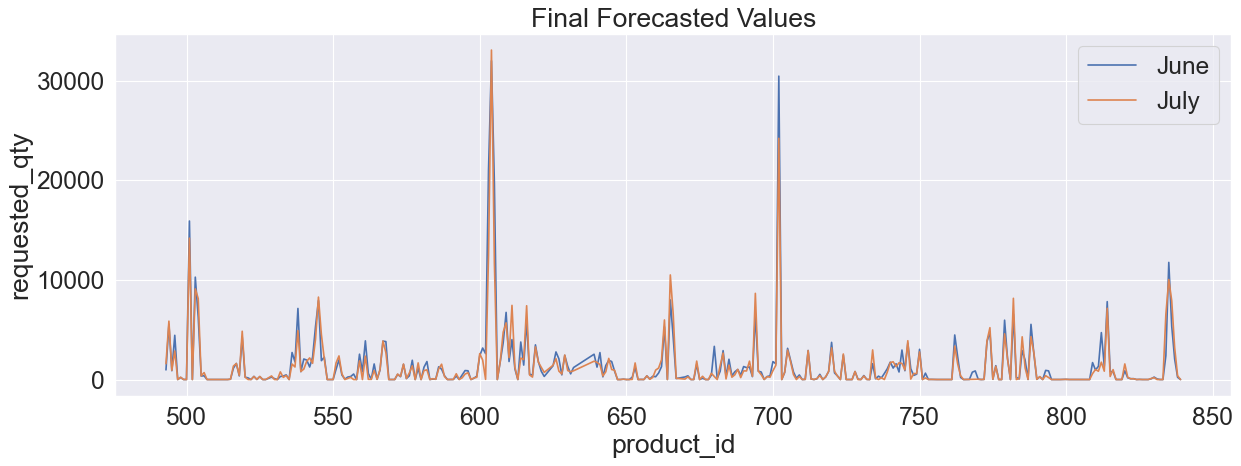

In [76]:
figure(figsize=(18, 6), dpi=80)
sorted_ids=np.sort(df["product_id"].unique())
plt.plot(sorted_ids,forecast[:-335],label="June")
plt.plot(sorted_ids,forecast[-335:],label="July")
plt.title("Final Forecasted Values")
plt.xlabel("product_id")
plt.ylabel("requested_qty")
plt.legend()

In [77]:
df_forecast=pd.DataFrame()
df_forecast["product_ids"]=sorted_ids
#df_forecast["May"]=may_for.values
df_forecast["June"]=forecast[:-335]
df_forecast["July"]=forecast[-335:]

## Final Answer

In [78]:
df_forecast

,product_ids,June,July
0,493,969.504357,1589.090580
1,494,5555.599694,5865.319672
2,495,885.138755,923.466232
3,496,4443.391155,2868.041196
4,497,0.000000,0.000000
5,498,205.900878,232.783219
6,499,1.424769,1.424769
7,500,0.000000,0.000000
8,501,15920.515402,14198.392704
9,502,0.000000,0.000000
